<a class="anchor" id="section-0"></a>
<img src="https://i.imgur.com/lTCPbz0.jpeg" alt='logo puc-sp' width='30%' align='left'>

### Pontifícia Universidade Católica de São Paulo (PUC-SP)

<h1 style=font-size:30px>StellarClassification</h1>


### Bacharelado em Ciência de Dados e Inteligência Artificial

#### Turma: CDIA21-MA

**Professor:** Jefferson de Oliveira Silva

**Alunos:**

<table align="left" style=font-size:15px>
<thead>
  <tr>
    <th style="text-align:left;">Nome</th>
    <th style="text-align:left;">RA</th>
    <th></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td style="text-align:left;">Carlos Eduardo de Oliveira</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Gustavo Schlieper Tessitore</td>
    <td>RA00297844</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Isaac Higuchi</td>
    <td>RA00306191</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">João Pedro Taves Araujo</td>
    <td>RA00297753</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Lucas Lopes Amorim</td>
    <td>RA00303799</td>
    <td></td>
  </tr>
  <tr>
    <td style="text-align:left;">Thiago de Jesus Carvalho</td>
    <td>RA00297792</td>
    <td></td>
  </tr>
</tbody>
</table>

<h3><b>Estrutura:</b></h3>
<ol>
   <li><a href="#section-1">Contextualização</a></li>
   <li><a href="#section-2">Objetivo do Trabalho</a></li>
   <li>
      <a href="#section-3">Método</a>
      <ol style="list-style: none; padding-left: 10px">
         <li>3.1. <a href="#section-3-1">Entendimento dos Dados</a></li>
         <li>3.2. <a href="#section-3-2">Preparação dos Dados</a></li>
         <ol style="list-style: none; padding-left: 20px">
            <li>3.2.1 <a href="#section-3-2-1">Gerando novos atributos</a></li>
            <li>3.2.2 <a href="#section-3-2-2">Tratando variáveis categórias</a></li>
         </ol>
         <li>3.3. <a href="#section-3-3">Modelagem</a></li>
         <ol style="list-style: none; padding-left: 20px">
            <li>3.3.1 <a href="#section-3-3-1">Modelo #1: Árvore de Decisão</a></li>
            <li>3.3.2 <a href="#section-3-3-2">Modelo #2: Floresta Aleatória de Classificação</a></li>
            <li>3.3.3 <a href="#section-3-3-3">Modelo #3: Naive Bayes</a></li>
            <li>3.3.4 <a href="#section-3-3-4">Modelo #4: SVC</a></li>
            <li>3.3.5 <a href="#section-3-3-5">Modelo #5: KNN</a></li>
         </ol>
      </ol>
   </li>
   <li><a href="#section-4">Limitações</a></li>
   <li><a href="#section-5">Conclusões</a></li>
</ol>
<p><a href="#section-n">Referências</a></p>

# 1. Contextualização <a class="anchor" id="section-1"></a>
[Voltar ao topo](#section-0)

# 2. Objetivo do Trabalho <a class="anchor" id="section-2"></a>
[Voltar ao topo](#section-0)

# 3. Método <a class="anchor" id="section-3"></a>
[Voltar ao topo](#section-0)

## 3.1 Entendimento dos Dados <a class="anchor" id="section-3-1"></a>
[Voltar ao topo](#section-0)

## 3.2 Preparação dos Dados <a class="anchor" id="section-3-2"></a>
[Voltar ao topo](#section-0)

In [34]:
# Para manipulação dos dados
import pandas as pd

# Para Dataviz
import matplotlib.pyplot as plt
import seaborn as sns

# Para criação do nosso pipeline
from sklearn.compose import ColumnTransformer

# Para tratamentos de dados
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

# Para separação em treino e teste
from sklearn.model_selection import train_test_split

# Para aplicar resamplings
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Para ignorar mensagens de warnings
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('data/star_classification.csv')
df.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [17]:
cols = ['alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'cam_col', 'redshift', 'MJD']

In [18]:
preprocessing = ColumnTransformer(transformers=[
    ('scaling', StandardScaler(), cols),
], remainder='drop')

In [19]:
target_encoder = OrdinalEncoder()

In [20]:
X, y = df.drop('class', axis=1), df['class']

In [21]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X , y, test_size=0.2)

In [22]:
X_train = preprocessing.fit_transform(X_train_full)
y_train_encoded = target_encoder.fit_transform(y_train.values.reshape(-1, 1))

In [23]:
X_test = preprocessing.transform(X_test_full)
y_test_encoded = target_encoder.fit_transform(y_test.values.reshape(-1, 1))

**Aplicando Oversampling:**

In [24]:
def apply_oversampling(X_train_, y_train_, **kwargs):
    ros = RandomOverSampler(**kwargs)
    X_train_oversam_, y_train_oversam_ = ros.fit_resample(X_train_, y_train_)
    return X_train_oversam_, y_train_oversam_

In [25]:
X_train_oversam, y_train_oversam = apply_oversampling(X_train, y_train, random_state=42)

**Aplicando Undersampling:**

In [26]:
def apply_undersampling(X_train_, y_train_, **kwargs):
    rus = RandomUnderSampler(**kwargs)
    X_train_undersam_, y_train_undersam_ = rus.fit_resample(X_train, y_train)
    return X_train_undersam_, y_train_undersam_

In [27]:
X_train_undersam, y_train_undersam = apply_undersampling(X_train, y_train, random_state=42)

**Aplicando PCA:**

**EM CONTRUÇÃO**

## 3.3 Escolhendo melhores técnicas de resample <a class="anchor" id="section-3-3"></a>
[Voltar ao topo](#section-0)

In [3]:
from sklearn import metrics

C:\Users\lucas\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [82]:
def calcululate_metrics(y_test_, y_pred_, pos_label=1, average='binary'):
    return (
    round(metrics.accuracy_score(y_test_, y_pred_), 3),
    round(metrics.precision_score(y_test_, y_pred_, pos_label=pos_label, average=average), 3),
    round(metrics.recall_score(y_test_, y_pred_, pos_label=pos_label, average=average), 3),
    round(metrics.f1_score(y_test_, y_pred_, pos_label=pos_label, average=average),3)
    )

In [83]:
def evaluate_resample(model, X_train_resample, X_test_resample, y_train_resample, y_test_resample):
    model.fit(X_train_resample, y_train_resample)

    y_pred = model.predict(X_test_resample)
    
    return calcululate_metrics(y_test_resample, y_pred, average='weighted')

In [62]:
%time
undersam_perf = evaluate_resample(
    RandomForestClassifier(random_state=42), X_train_undersam, X_test, y_train_undersam, y_test
)
undersam_perf

Wall time: 0 ns


(0.972, 0.972, 0.972, 0.972)

In [39]:
%time
oversam_perf = evaluate_resample(
    RandomForestClassifier(random_state=42), X_train_oversam, X_test, y_train_oversam, y_test
)
oversam_perf

Wall time: 0 ns


(0.977, 0.977, 0.977, 0.977)

In [40]:
%time
default_perf = evaluate_resample(
    RandomForestClassifier(random_state=42), X_train, X_test, y_train, y_test
)
default_perf

Wall time: 0 ns


(0.978, 0.978, 0.978, 0.978)

In [ ]:
%time
undersam_performance = evaluate_resample(models, models_labels, X_train_undersam, X_test, y_train_undersam, y_test)
undersam_performance

In [84]:
def plot_resample_comparison(over_result, under_result, default_result, suptitle, title):
    metrics_list = ['accuracy', 'precision', 'recall', 'f1']
    
    resampling_results = pd.DataFrame(
        {
            'Resample': ['oversample']*len(over_result) + ['undersample']*4 + ['default']*4,
            'Metric': metrics_list*3,
            'Score': over_result + under_result + default_result
        }
    )
    
    plt.figure(figsize=(15,6))
    plt.suptitle(suptitle, weight='bold', fontsize=24)
    plt.title(title, pad=30, loc='left', fontsize=20)
    plt.subplots_adjust(top=0.8)
    ax = sns.barplot(data=resampling_results, x='Metric', y='Score', hue='Resample')
    plt.ylim((0, 1))
    plt.legend(title='', fontsize=16, bbox_to_anchor=(1.05, 1))
    for i in ax.containers:
        ax.bar_label(i, fontsize=10)
    plt.ylim(0.9, 1)
    plt.show()

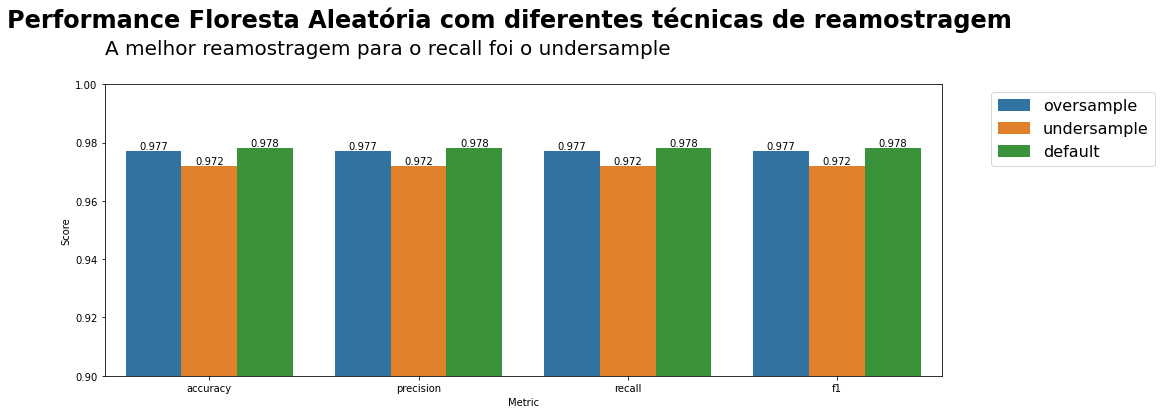

In [85]:
plot_resample_comparison(oversam_perf, undersam_perf, default_perf,
                         suptitle='Performance Floresta Aleatória com diferentes técnicas de reamostragem',
                         title='A melhor reamostragem para o recall foi o undersample'
                        )

## 3.3 Modelagem <a class="anchor" id="section-3-3"></a>
[Voltar ao topo](#section-0)

### 3.3.1 Modelo #1: Árvore de Decisão <a class="anchor" id="section-3-3-1"></a>
[Voltar ao topo](#section-0)

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, plot_confusion_matrix


In [ ]:
cl_tree = DecisionTreeClassifier()

In [ ]:
cl_tree = cl_tree.fit(X_train, y_train)
previsao = cl_tree.predict(X_test)

In [ ]:
print(classification_report(y_test, previsao))

In [ ]:
plot_confusion_matrix(cl_tree, X_test, y_test)

### 3.3.2 Modelo #2: Floresta Aleatória de Classificação <a class="anchor" id="section-3-3-2"></a>
[Voltar ao topo](#section-0)

In [5]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf = rf_clf.fit(X_train, y_train)

previsao_rf = rf_clf.predict(X_test)

In [ ]:
print(classification_report(y_test, previsao_rf))

In [ ]:
plot_confusion_matrix(rf_clf, X_test, y_test)

### 3.3.3 Modelo #3: Naive Bayes <a class="anchor" id="section-3-3-3"></a>
[Voltar ao topo](#section-0)

In [6]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

In [ ]:
predict = gnb.predict(X_test)
predict

In [ ]:
accuracy_score(y_test, predict)

print(classification_report(y_test, predict))

### 3.3.4 Modelo #4: SVC <a class="anchor" id="section-3-3-4"></a>
[Voltar ao topo](#section-0)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

In [ ]:
model = SVC(class_weight='balanced', kernel='rbf', gamma='scale')
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

### 3.3.5 Modelo #5: KNN <a class="anchor" id="section-3-3-5"></a>
[Voltar ao topo](#section-0)

In [86]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      GALAXY       0.92      0.96      0.94     11803
         QSO       0.96      0.86      0.91      3891
        STAR       0.92      0.90      0.91      4306

    accuracy                           0.93     20000
   macro avg       0.93      0.91      0.92     20000
weighted avg       0.93      0.93      0.93     20000



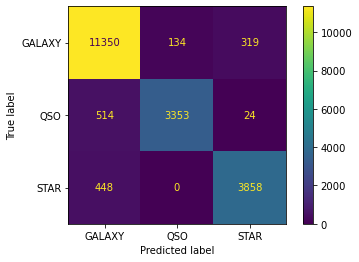

In [87]:
plot_confusion_matrix(knn_model, X_test, y_test)

## Rascunho

In [29]:
# def evaluate_resample(models, models_labels, X_train_resample, X_test_resample, y_train_resample, y_test_resample):
#     results = dict()
#     for m, label in zip(models, models_labels):
#         m.fit(X_train_resample, y_train_resample)
        
#         y_pred = m.predict(X_test_resample)
        
#         results[label] = calcululate_metrics(y_test_resample, y_pred, average='weighted')
        
#     return results

In [32]:
models = [
    DecisionTreeClassifier(),
    RandomForestClassifier(random_state=42),
    GaussianNB(),
    SVC(random_state=42)
]

models_labels = [
    'Árvore de Decisão',
    'Floresta Aleatória',
    'Naive Bayes',
    'SVC'
]

In [33]:
%time
undersam_performance = evaluate_resample(models, models_labels, X_train_undersam, X_test, y_train_undersam, y_test)
undersam_performance

Wall time: 0 ns


{'Árvore de Decisão': (0.951, 0.955, 0.951, 0.952),
 'Floresta Aleatória': (0.972, 0.972, 0.972, 0.972),
 'Naive Bayes': (0.712, 0.777, 0.712, 0.677),
 'SVC': (0.95, 0.951, 0.95, 0.95)}

In [79]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train_undersam, y_train_undersam)

y_pred = model.predict(X_test)

In [80]:
calcululate_metrics(y_test, y_pred, average='micro')

(0.95, 0.95015, 0.95015, 0.95015)